In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
fcpo_daily_badjusted=pd.read_hdf('data/processed_dta.h5','fcpo_daily_badjusted')
fcpo_daily_nadjusted=pd.read_hdf('data/processed_dta.h5','fcpo_daily_nadjusted')

In [3]:
fcpo_close_nadjusted=fcpo_daily_nadjusted['2011-01-01':'2018-10-01']['Close'].reset_index()
fcpo_close_nadjusted=fcpo_close_nadjusted.rename(columns={'Date':'ds','Close':'y'})

In [4]:
nadjusted_prophet=Prophet(daily_seasonality=False)

In [4]:
#nadjusted_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
nadjusted_prophet.fit(fcpo_close_nadjusted)

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
future_dates=nadjusted_prophet.make_future_dataframe(15,freq='B')
nadjusted_forecast=nadjusted_prophet.predict(future_dates)

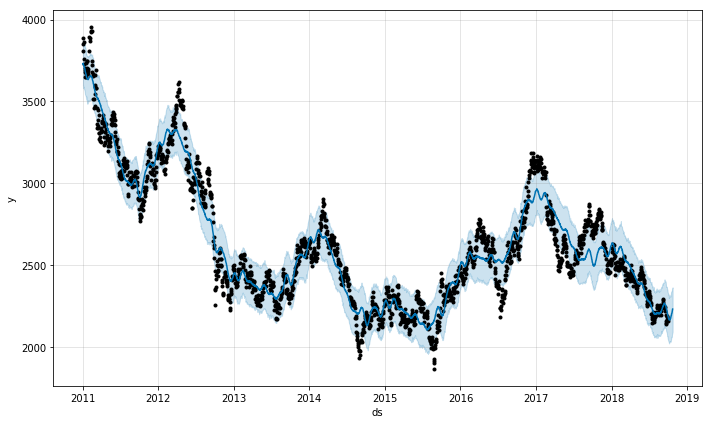

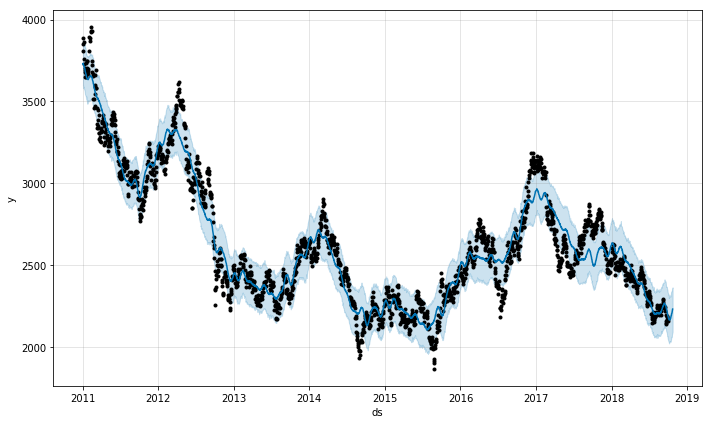

In [15]:
nadjusted_prophet.plot(nadjusted_forecast)

In [5]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [11]:
nadjusted_cv=cross_validation(nadjusted_prophet,initial=365,horizon=10,period=5)

AttributeError: 'NoneType' object has no attribute 'copy'

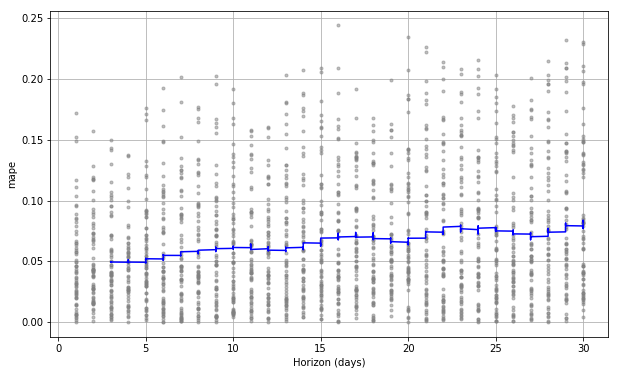

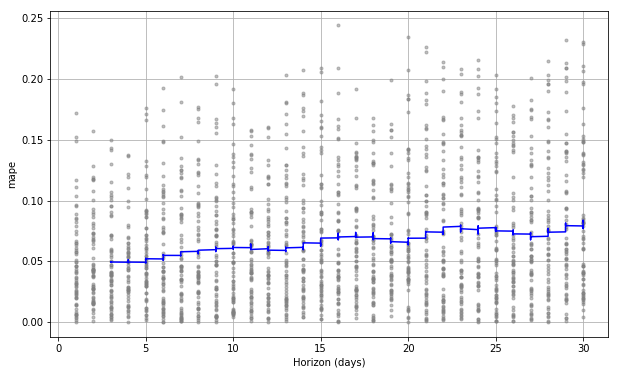

In [9]:
plot_cross_validation_metric(nadjusted_cv,metric='mape')

In [8]:
nadjusted_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-01-13,2693.615191,2591.372915,2804.313642,2494,2014-01-10
1,2014-01-15,2696.333630,2600.228448,2812.088418,2525,2014-01-10
2,2014-01-16,2691.044555,2585.699639,2793.994997,2544,2014-01-10
3,2014-01-20,2706.485129,2597.032631,2812.788684,2580,2014-01-10
4,2014-01-21,2709.044520,2603.794621,2815.755471,2588,2014-01-10


In [20]:
nadjusted_cv[nadjusted_cv['ds']=='2015-01-13']

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
479,2015-01-13,2165.656204,2054.090423,2271.798745,2354,2014-12-21
490,2015-01-13,2203.820814,2097.742403,2311.415059,2354,2015-01-05
